In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 加载数据
np_XY = np.load('np_XY.npy')
np_cont = np.load('np_cont.npy')

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as ticker

config={"font.family":'serif',
        "font.size":10,
        "mathtext.fontset":'stix',
        "font.serif":['SimSun'],
       }

rcParams.update(config)

z =np_cont[:,30]
x = np_XY[:,0]
y = np_XY[:,1]


shape=np_cont.shape

Z_min=np.zeros(shape[1])
Z_max=np.zeros(shape[1])

for i in range(shape[1]):
    Z_min[i]=np_cont[:,i].min()
    Z_max[i]=np_cont[:,i].max()


print(" max and min", (Z_min.min(), Z_max.max()))
Xsort_indices = np.lexsort((y, x))  

Xsorted_x = x[Xsort_indices]
Xsorted_y = y[Xsort_indices]
Xsorted_z = z[Xsort_indices]

Xsection_x1=Xsorted_x[Xsorted_x == 1]
Xsection_y1=Xsorted_y[Xsorted_x == 1]
Xsection_z1=Xsorted_z[Xsorted_x == 1]

Xsection_x0=Xsorted_x[Xsorted_x == 0]
Xsection_y0=Xsorted_y[Xsorted_x == 0]
Xsection_z0=Xsorted_z[Xsorted_x == 0]

Ysort_indices = np.lexsort((x,y)) 

Ysorted_x = x[Ysort_indices]
Ysorted_y = y[Ysort_indices]
Ysorted_z = z[Ysort_indices]

Ysection_x1=Ysorted_x[Ysorted_y == 1]
Ysection_y1=Ysorted_y[Ysorted_y == 1]
Ysection_z1=Ysorted_z[Ysorted_y == 1]

Ysection_x0=Ysorted_x[Ysorted_y == 0]
Ysection_y0=Ysorted_y[Ysorted_y == 0]
Ysection_z0=Ysorted_z[Ysorted_y == 0]



 max and min (-0.2, 0.2)


In [2]:
def scientific_notationy(x, pos):

    if x == 0:
        return r'$0$' 
    else:

        exponent = np.floor(np.log10(abs(x)))
        mantissa = x / (10**exponent)
        

        if x < 0:
            return r'${0:.2f} \cdot 10^{{{1}}}$'.format(mantissa, int(exponent))
        else:
            return r'${0:.2f} \cdot 10^{{{1}}}$'.format(mantissa, int(exponent))
        
def scientific_notationx(x, pos):

    return r"${0:.2f}$".format(x)

def scientific_notationxx(x, pos):

    return r"${0:.1f}$".format(x)


findfont: Generic family 'serif' not found because none of the following families were found: SimSun
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: SimSun
/tmp/ipykernel_252289/3000825516.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
findfont: Generic family 'serif' not found because none of the following families were found: SimSun
findfont: Generic family 'serif' not found because none of the following families were found: SimSun


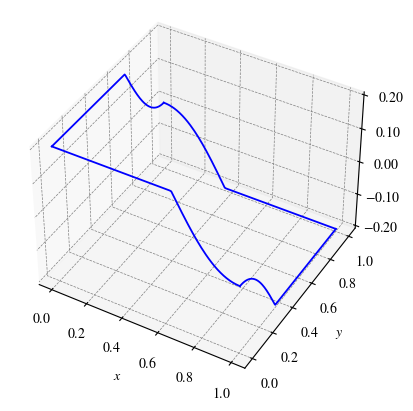

In [3]:
ax = plt.axes(projection='3d')
ax.plot3D(Xsection_x0, Xsection_y0, Xsection_z0, 'b',linewidth=1.3)
ax.plot3D(Xsection_x1, Xsection_y1, Xsection_z1, 'b',linewidth=1.3)
ax.plot3D(Ysection_x0, Ysection_y0, Ysection_z0, 'b',linewidth=1.3)
ax.plot3D(Ysection_x1, Ysection_y1, Ysection_z1, 'b',linewidth=1.3)
ax.view_init(elev=45)
ax.xaxis._axinfo["grid"].update({"linestyle": '--', "linewidth": 0.5, "color": "gray"})
ax.yaxis._axinfo["grid"].update({"linestyle": '--', "linewidth": 0.5, "color": "gray"})
ax.zaxis._axinfo["grid"].update({"linestyle": '--', "linewidth": 0.5, "color": "gray"})

plt.xticks([0, 0.2, 0.4,0.6,0.8,1])
plt.yticks([0, 0.2, 0.4,0.6,0.8,1])

yticks = ax.get_yticks()

xticks = ax.get_xticks()

#ax.set_zticks([0, 0.1, 0.2, 0.3])
ax.set_zticks([-0.2, -0.1, 0, 0.1,0.2])
zticks=ax.get_zticks()

ax.set_yticks(yticks)  
ax.set_yticklabels([scientific_notationxx(tick, None) for tick in yticks]) 

ax.set_xticks(xticks)
ax.set_xticklabels([scientific_notationxx(tick, None) for tick in xticks])  

ax.set_zticks(zticks)
ax.set_zticklabels([scientific_notationx(tick, None) for tick in zticks])
ax.view_init(elev=40)
plt.tight_layout()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.savefig('control.pdf')
plt.show()
